In [1]:
from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
from simulation_data.galaxies.galaxy import age_profile
my_galaxy_population = GalaxyPopulation()
ids = my_galaxy_population.select_galaxies(redshift=2, mass_min=10.5, mass_max=12)

In [2]:
#Do not run after 1st time :)
#will integrate this into galaxy_population.py code
#either single function, or each get function appends an array to a pre-existing hdf5 file. 
#Initialize file in select_galaxies.
import h5py
with h5py.File('galaxy_population_data_2.hdf5', 'w') as f:
    #writing data
    d1 = f.create_dataset('ids', data = my_galaxy_population.select_galaxies(redshift=2, mass_min=10.5, mass_max=12))
    d2 = f.create_dataset('mean_age', data = my_galaxy_population.get_mean_stellar_age())
    d3 = f.create_dataset('median_age', data = my_galaxy_population.get_median_stellar_age())
    d4 = f.create_dataset('current_SFR', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0.01))
    d5 = f.create_dataset('average_SFR_1', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=1))
    d6 = f.create_dataset('average_SFR_2', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=2))
    d7 = f.create_dataset('SFR_ratio', data = my_galaxy_population.get_stellar_formation_rate_ratio(timescale=1))
    d8 = f.create_dataset('effective_radius', data = my_galaxy_population.get_effective_radius())
    d9 = f.create_dataset('mean_metallicity', data = my_galaxy_population.get_mean_stellar_metallicity())
    d10 = f.create_dataset('total_mass', data = my_galaxy_population.get_total_stellar_mass())

In [3]:
import h5py
with h5py.File('galaxy_population_data_2.hdf5', 'r') as f:
    ids = f['ids'][:]
    mean_age = f['mean_age'][:]
    median_age = f['median_age'][:]
    current_SFR = f['current_SFR'][:]    
    average_SFR_1 = f['average_SFR_1'][:]
    average_SFR_2 = f['average_SFR_2'][:]
    SFR_ratio = f['SFR_ratio'][:]
    effective_radius = f['effective_radius'][:]
    mean_metallicity = f['mean_metallicity'][:]
    total_mass = f['total_mass'][:]

In [4]:
low_ratio = ids[SFR_ratio<0.01][:10]
mid_ratio = ids[(0.33<SFR_ratio) & (SFR_ratio<0.35)][:10]
high_ratio = ids[0.85<SFR_ratio][:10]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_data.galaxies.galaxy import age_profile

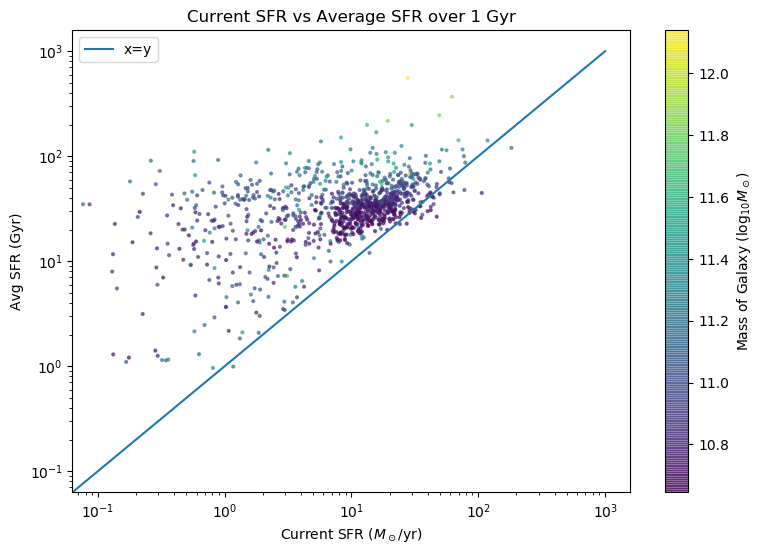

In [73]:
plt.style.use('default')
#plot for Current SFR vs Avg SFR over 1 Gyr
plt.figure(figsize=(9,6)) # 10 is width, 7 is height
plt.plot(np.linspace(0, 1000, 10000), np.linspace(0, 1000, 10000), label='x=y')
plt.scatter(current_SFR, average_SFR_1, c=total_mass, s=4, alpha=0.6)
plt.legend()
plt.colorbar(label='Mass of Galaxy ($\log_{10} M_\odot$)')
plt.title('Current SFR vs Average SFR over 1 Gyr')
plt.xlabel('Current SFR ($M_\odot$/yr)')
plt.ylabel('Avg SFR (Gyr)')
plt.xscale('log')
plt.yscale('log')

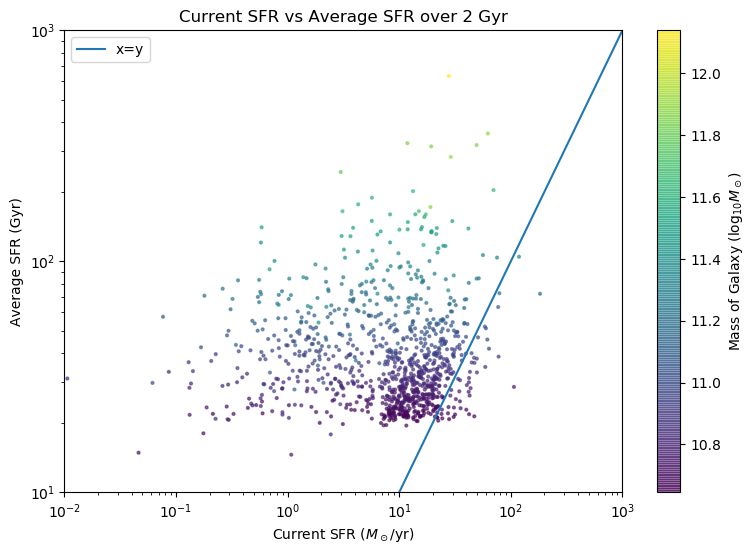

In [74]:
#plot for Current SFR vs Avg SFR over 2 Gyr
plt.figure(figsize=(9,6)) # 10 is width, 7 is height
plt.plot(np.linspace(10, 1000, 10000), np.linspace(10, 1000, 10000), label='x=y')
plt.scatter(current_SFR, average_SFR_2, c=total_mass, s=4, alpha=0.6)
plt.xlim(1e-2, 1e3)
plt.ylim(1e1, 1e3)
plt.legend()
plt.colorbar(label='Mass of Galaxy ($\log_{10} M_\odot$)')
plt.title('Current SFR vs Average SFR over 2 Gyr')
plt.xlabel('Current SFR ($M_\odot$/yr)')
plt.ylabel('Average SFR (Gyr)')
plt.xscale('log')
plt.yscale('log')


In [18]:
(len(SFR_ratio[SFR_ratio==0]))

35

C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'galaxy count')

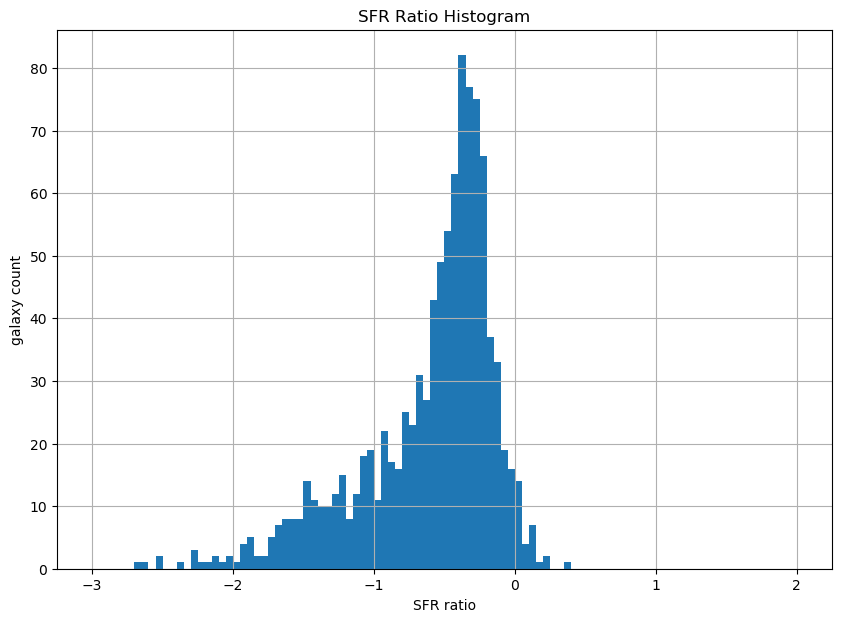

In [61]:
#histogram for Current SFR vs Avg SFR over 1 Gyr
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.hist(np.log10(SFR_ratio), range=[-3, 2], bins=100, histtype='bar')
plt.grid()
plt.title('SFR Ratio Histogram')
plt.xlabel('SFR ratio')
plt.ylabel('galaxy count')

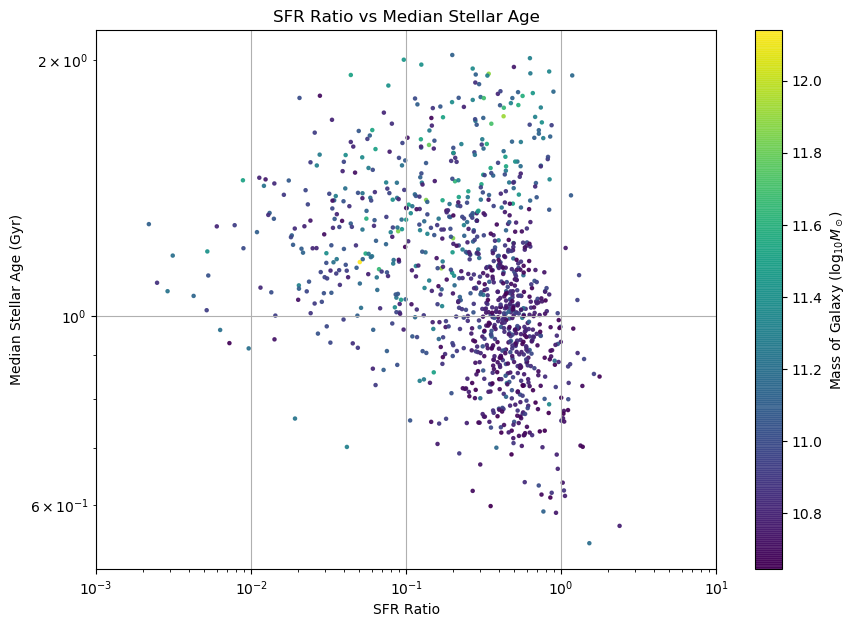

In [50]:
#plot for SFR ratio vs median stellar age
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.scatter(SFR_ratio, median_age, c=total_mass, s=5, alpha=0.9)
plt.xlim(1e-3, 1e1)
plt.grid()
plt.colorbar(label='Mass of Galaxy ($\log_{10} M_\odot$)')
plt.title('SFR Ratio vs Median Stellar Age')
plt.xlabel('SFR Ratio')
plt.ylabel('Median Stellar Age (Gyr)')
plt.xscale('log')
plt.yscale('log')

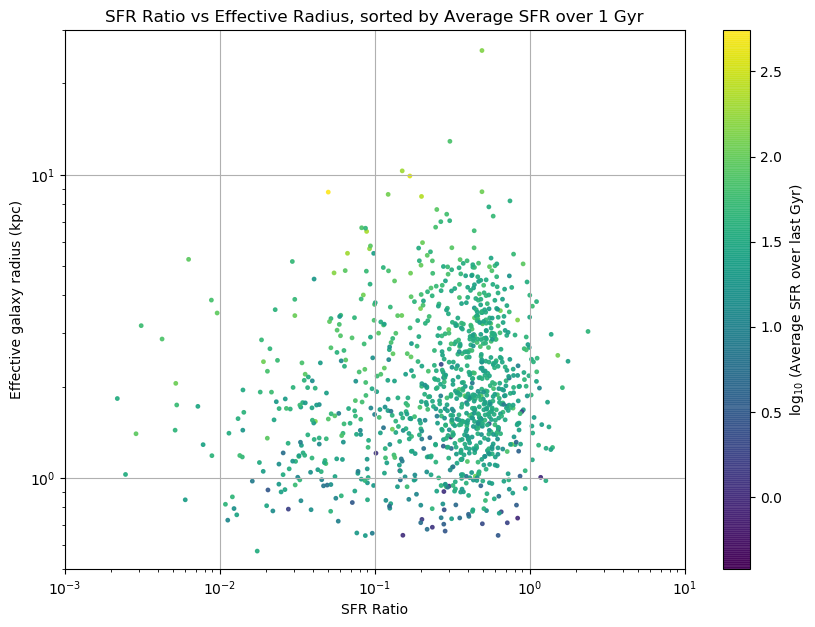

In [48]:
#plot for SFR ratio vs effective galaxy radius
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.scatter(SFR_ratio, effective_radius, c=np.log10(average_SFR_1), s=6, alpha=0.9)
plt.xlim(1e-3, 1e1)
plt.ylim(0.5, 30)
plt.grid()
plt.colorbar(label='$\log_{10}$ (Average SFR over last Gyr)')
plt.title('SFR Ratio vs Effective Radius, sorted by Average SFR over 1 Gyr')
plt.xlabel('SFR Ratio')
plt.ylabel('Effective galaxy radius (kpc)')
plt.xscale('log')
plt.yscale('log')
#https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

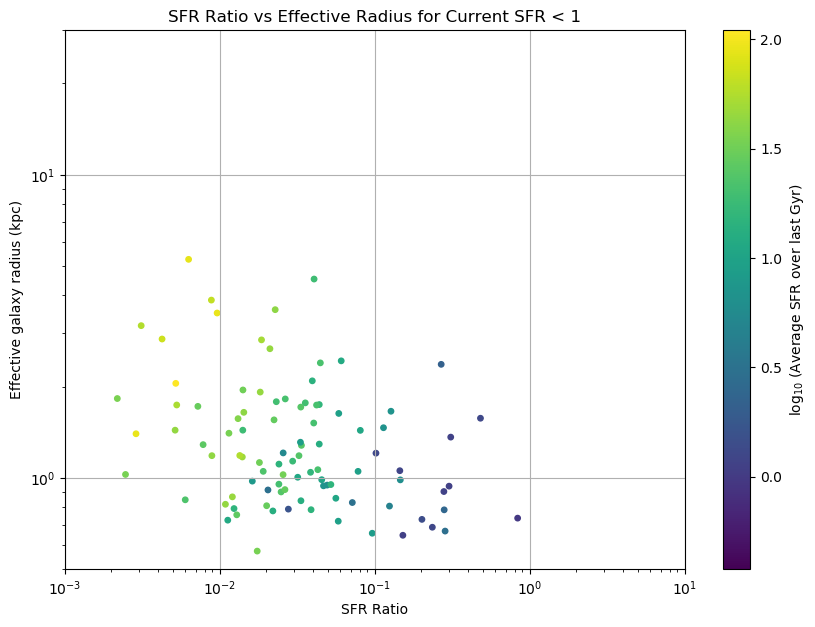

In [49]:
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.scatter(SFR_ratio[current_SFR<1], effective_radius[current_SFR<1], c=np.log10(average_SFR_1[current_SFR<1]), s=15)
plt.xlim(1e-3, 1e1)
plt.ylim(0.5, 30)
plt.grid()
plt.colorbar(label = '$\log_{10}$ (Average SFR over last Gyr)')
plt.title('SFR Ratio vs Effective Radius for Current SFR < 1')
plt.xlabel('SFR Ratio')
plt.ylabel('Effective galaxy radius (kpc)')
plt.xscale('log')
plt.yscale('log')

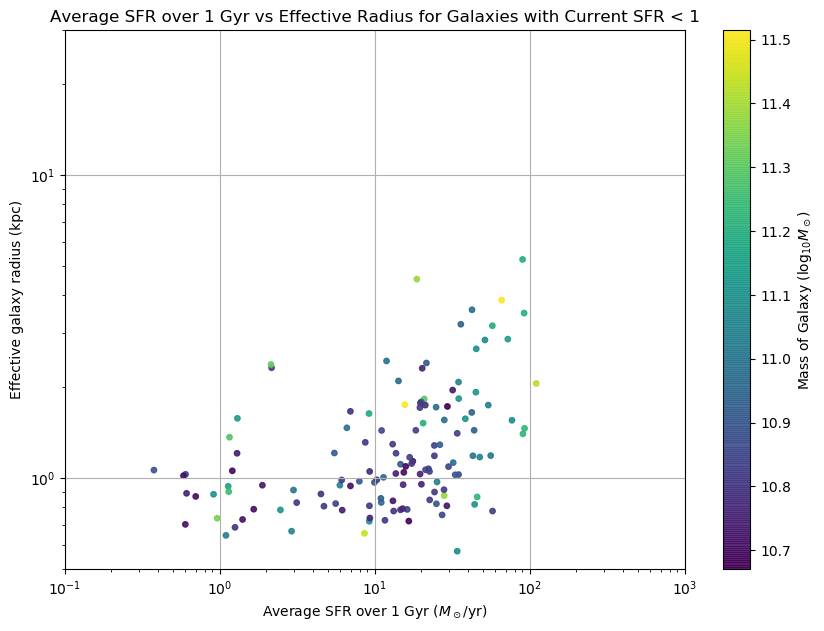

In [51]:
##plt age profiles of left & right of average_SFR_1 =1 (follows)
plt.style.use('default')
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.scatter(average_SFR_1[current_SFR<1], effective_radius[current_SFR<1], c=total_mass[current_SFR<1], s=15, alpha = 0.9)
plt.xlim(1e-1, 1e3)#add mass as color
plt.ylim(0.5, 30)
plt.grid()
plt.colorbar(label='Mass of Galaxy ($\log_{10} M_\odot$)')
plt.title('Average SFR over 1 Gyr vs Effective Radius for Galaxies with Current SFR < 1')
plt.xlabel('Average SFR over 1 Gyr ($M_\odot$/yr)')
plt.ylabel('Effective galaxy radius (kpc)')
plt.xscale('log')
plt.yscale('log')

In [37]:
len(ids[(average_SFR_1<10) & (current_SFR<1)])

44

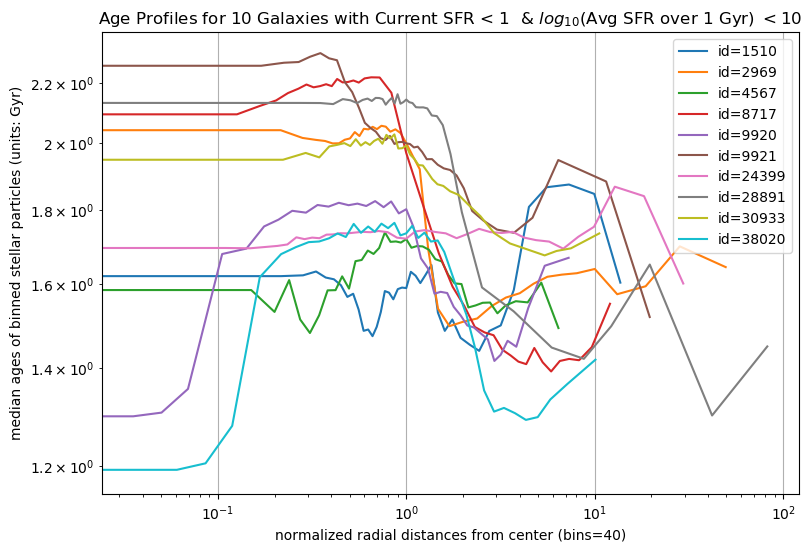

In [78]:
#age profiles of 10 galaxies to the left of 1e1 on above plot

#since I had already shown plots for n_bins=20
#thought I would plot the age profiles for n_bins=40
#also plotted 10 instead of 5 galaxies
#in case it helps
plt.style.use('default')
plt.figure(figsize=(9,6))
for id in ids[(average_SFR_1<10) & (current_SFR<1)][:10]:
    plt.plot(age_profile(id=id, redshift=2, n_bins=40)[1], age_profile(id=id, redshift=2, n_bins=40)[0], label='id='+str(id))
plt.legend()
plt.grid()
plt.title('Age Profiles for 10 Galaxies with Current SFR < 1  & $log_{10}$(Avg SFR over 1 Gyr) $< 10$')
plt.xlabel('normalized radial distances from center (bins=40)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')

In [30]:
len(ids[(average_SFR_1>10) & (current_SFR<1)])

87

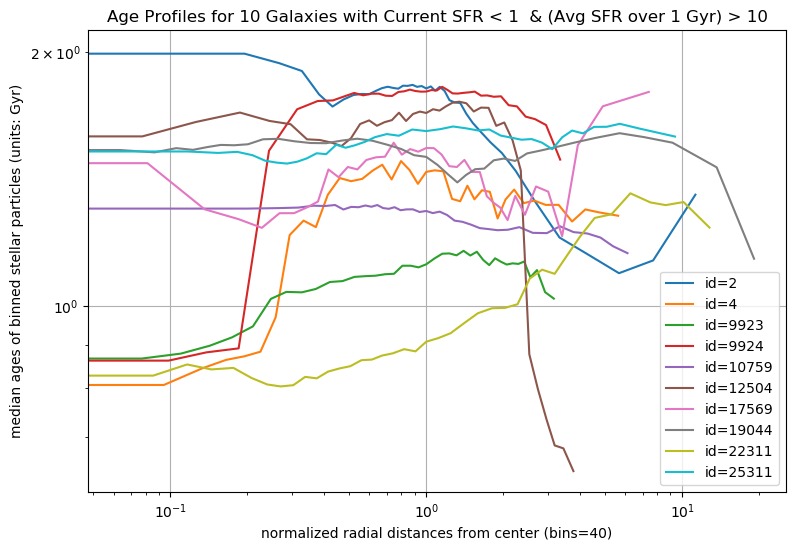

In [80]:
#age profiles of 10 galaxies to the right of 1e1 on plot above the above plot
plt.figure(figsize=(9,6))
for id in ids[(average_SFR_1>10) & (current_SFR<1)][:10]:
    plt.plot(age_profile(id=id, redshift=2, n_bins=40)[1], age_profile(id=id, redshift=2, n_bins=40)[0], label='id='+str(id))
plt.legend()
plt.grid()
plt.title('Age Profiles for 10 Galaxies with Current SFR < 1  & (Avg SFR over 1 Gyr) > 10')
plt.xlabel('normalized radial distances from center (bins=40)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')

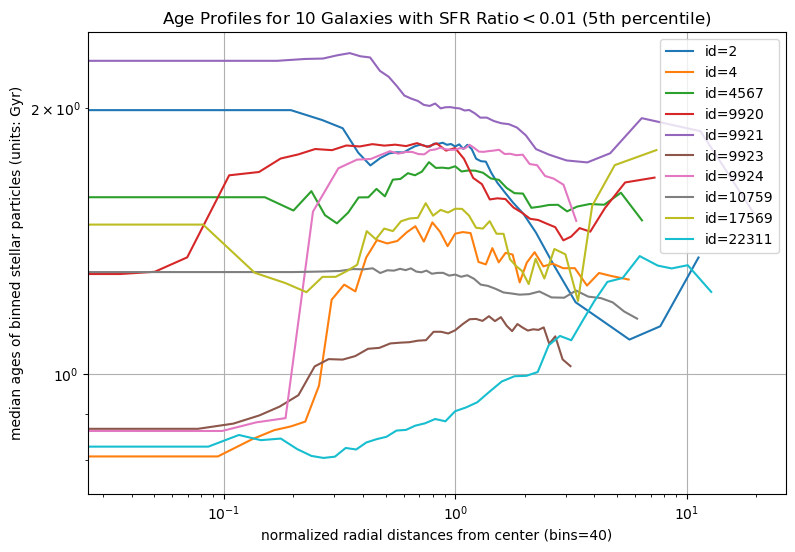

In [81]:
#since I had already shown plots for n_bins=20
#thought I would plot the age profiles for n_bins=40
#also plotted 10 instead of 5 galaxies
#in case it helps
plt.figure(figsize=(9,6))
for id in low_ratio:
    plt.plot(age_profile(id=id, redshift=2, n_bins=40)[1], age_profile(id=id, redshift=2, n_bins=40)[0], label='id='+str(id))
plt.legend()
plt.grid()
plt.title('Age Profiles for 10 Galaxies with SFR Ratio$<0.01$ (5th percentile)')
plt.xlabel('normalized radial distances from center (bins=40)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')

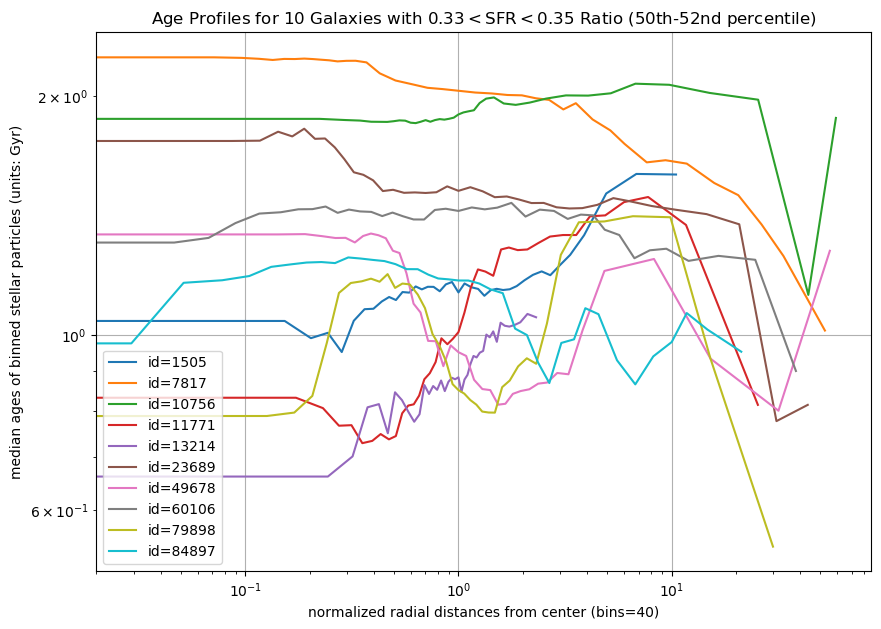

In [82]:
plt.figure(figsize=(10,7))
for id in mid_ratio:
    plt.plot(age_profile(id=id, redshift=2, n_bins=40)[1], age_profile(id=id, redshift=2, n_bins=40)[0], label='id='+str(id))
plt.legend()
plt.grid()    
plt.title('Age Profiles for 10 Galaxies with $0.33<$SFR$<0.35$ Ratio (50th-52nd percentile)')
plt.xlabel('normalized radial distances from center (bins=40)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')

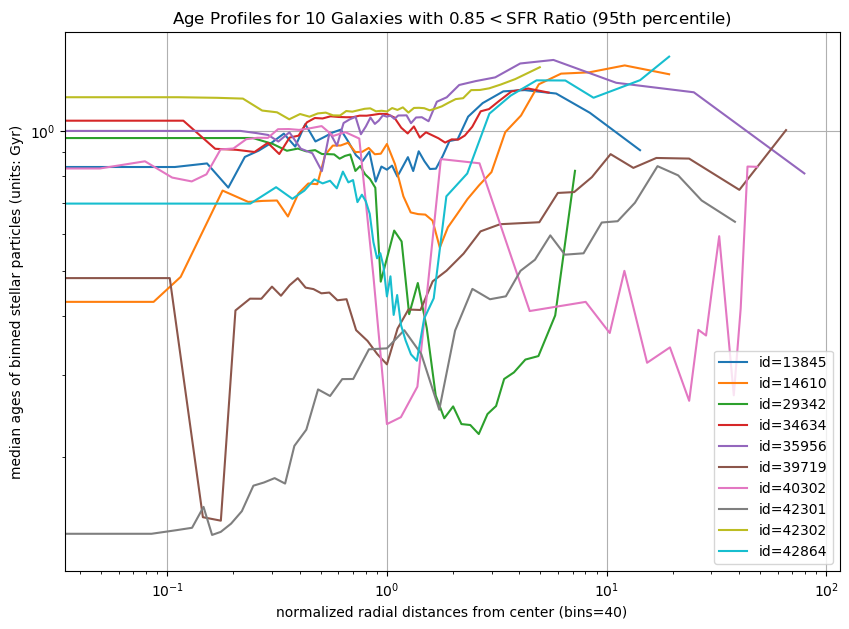

In [83]:
plt.figure(figsize=(10,7))
for id in high_ratio:
    plt.plot(age_profile(id=id, redshift=2, n_bins=40)[1], age_profile(id=id, redshift=2, n_bins=40)[0], label='id='+str(id))
plt.legend()
plt.grid()
plt.title('Age Profiles for 10 Galaxies with $0.85<$SFR Ratio (95th percentile)')
plt.xlabel('normalized radial distances from center (bins=40)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')#plot lines